In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

In [2]:
def preprocess(df,region_df):
    df = df[df['Season'] == 'Summer']
    df = df.merge(region_df, on='NOC', how='left')
    df.drop_duplicates(inplace=True)
    df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)
    return df

### Helper Function


In [3]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x


def country_year_list(df):
    years = df['Year'].unique().tolist()
    years.sort()
    years.insert(0, 'Overall')

    country = np.unique(df['region'].dropna().values).tolist()
    country.sort()
    country.insert(0, 'Overall')

    return years,country

def data_over_time(df,col):

    nations_over_time = df.drop_duplicates(['Year', col])['Year'].value_counts().reset_index().sort_values('index')
    nations_over_time.rename(columns={'index': 'Edition', 'Year': col}, inplace=True)
    return nations_over_time


def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

def yearwise_medal_tally(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

    new_df = temp_df[temp_df['region'] == country]
    final_df = new_df.groupby('Year').count()['Medal'].reset_index()

    return final_df

def country_event_heatmap(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

    new_df = temp_df[temp_df['region'] == country]

    pt = new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0)
    return pt


def most_successful_countrywise(df, country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

def weight_v_height(df,sport):
    athlete_df = df.drop_duplicates(subset=['Name', 'region'])
    athlete_df['Medal'].fillna('No Medal', inplace=True)
    if sport != 'Overall':
        temp_df = athlete_df[athlete_df['Sport'] == sport]
        return temp_df
    else:
        return athlete_df

def men_vs_women(df):
    athlete_df = df.drop_duplicates(subset=['Name', 'region'])

    men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
    women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

    final = men.merge(women, on='Year', how='left')
    final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

    final.fillna(0, inplace=True)

    return final

### Loading the Data

In [4]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

df = preprocess(df,region_df)

In [6]:
years = df['Year'].unique().tolist()
years.sort()
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

### Medal Tally


In [12]:
years, country = country_year_list(df)

selected_year = input("Select Year: ")
selected_country = input("Select Country: ")

medal_tally = fetch_medal_tally(df, selected_year, selected_country)
if selected_year == 'Overall' and selected_country == 'Overall':
    print("Overall Tally")
if selected_year != 'Overall' and selected_country == 'Overall':
    print("Medal Tally in", selected_year, "Olympics")
if selected_year == 'Overall' and selected_country != 'Overall':
    print(selected_country, "overall performance")
if selected_year != 'Overall' and selected_country != 'Overall':
    print(selected_country, "performance in", selected_year, "Olympics")
print(medal_tally)

Select Year: Overall
Select Country: India
India overall performance
    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0     

### Overall Analysis

Top Statistics
Editions: 29
Hosts: 23
Sports: 52
Events: 651
Nations: 205
Athletes: 116122


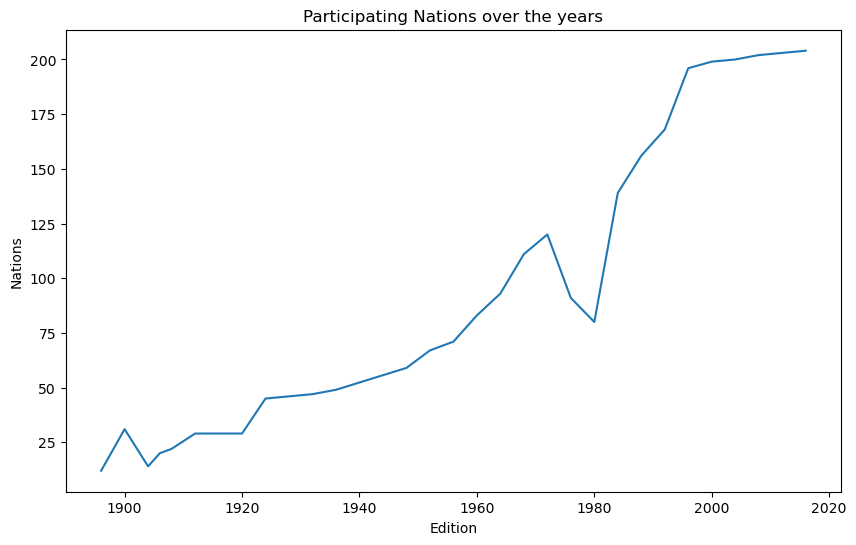

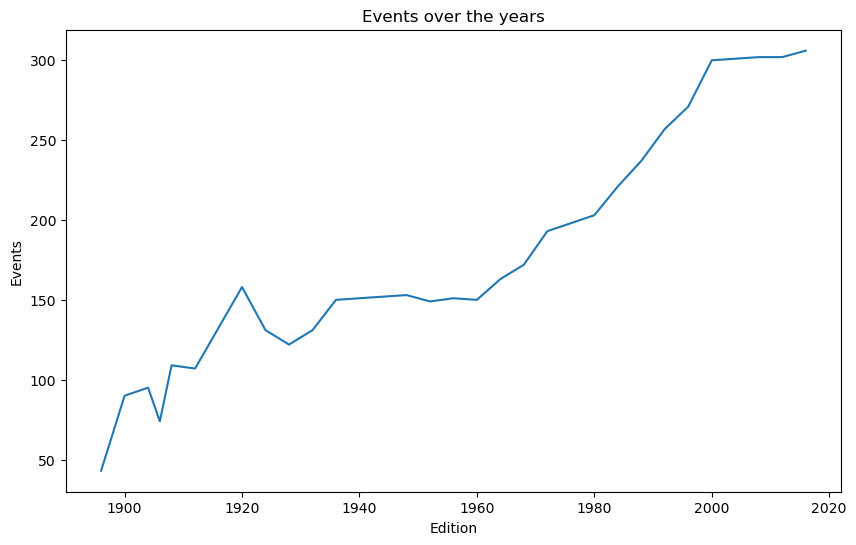

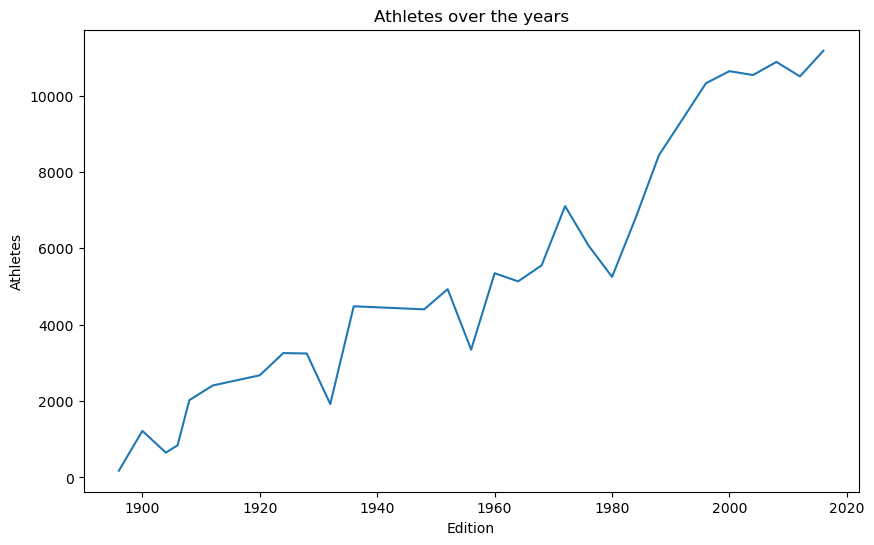

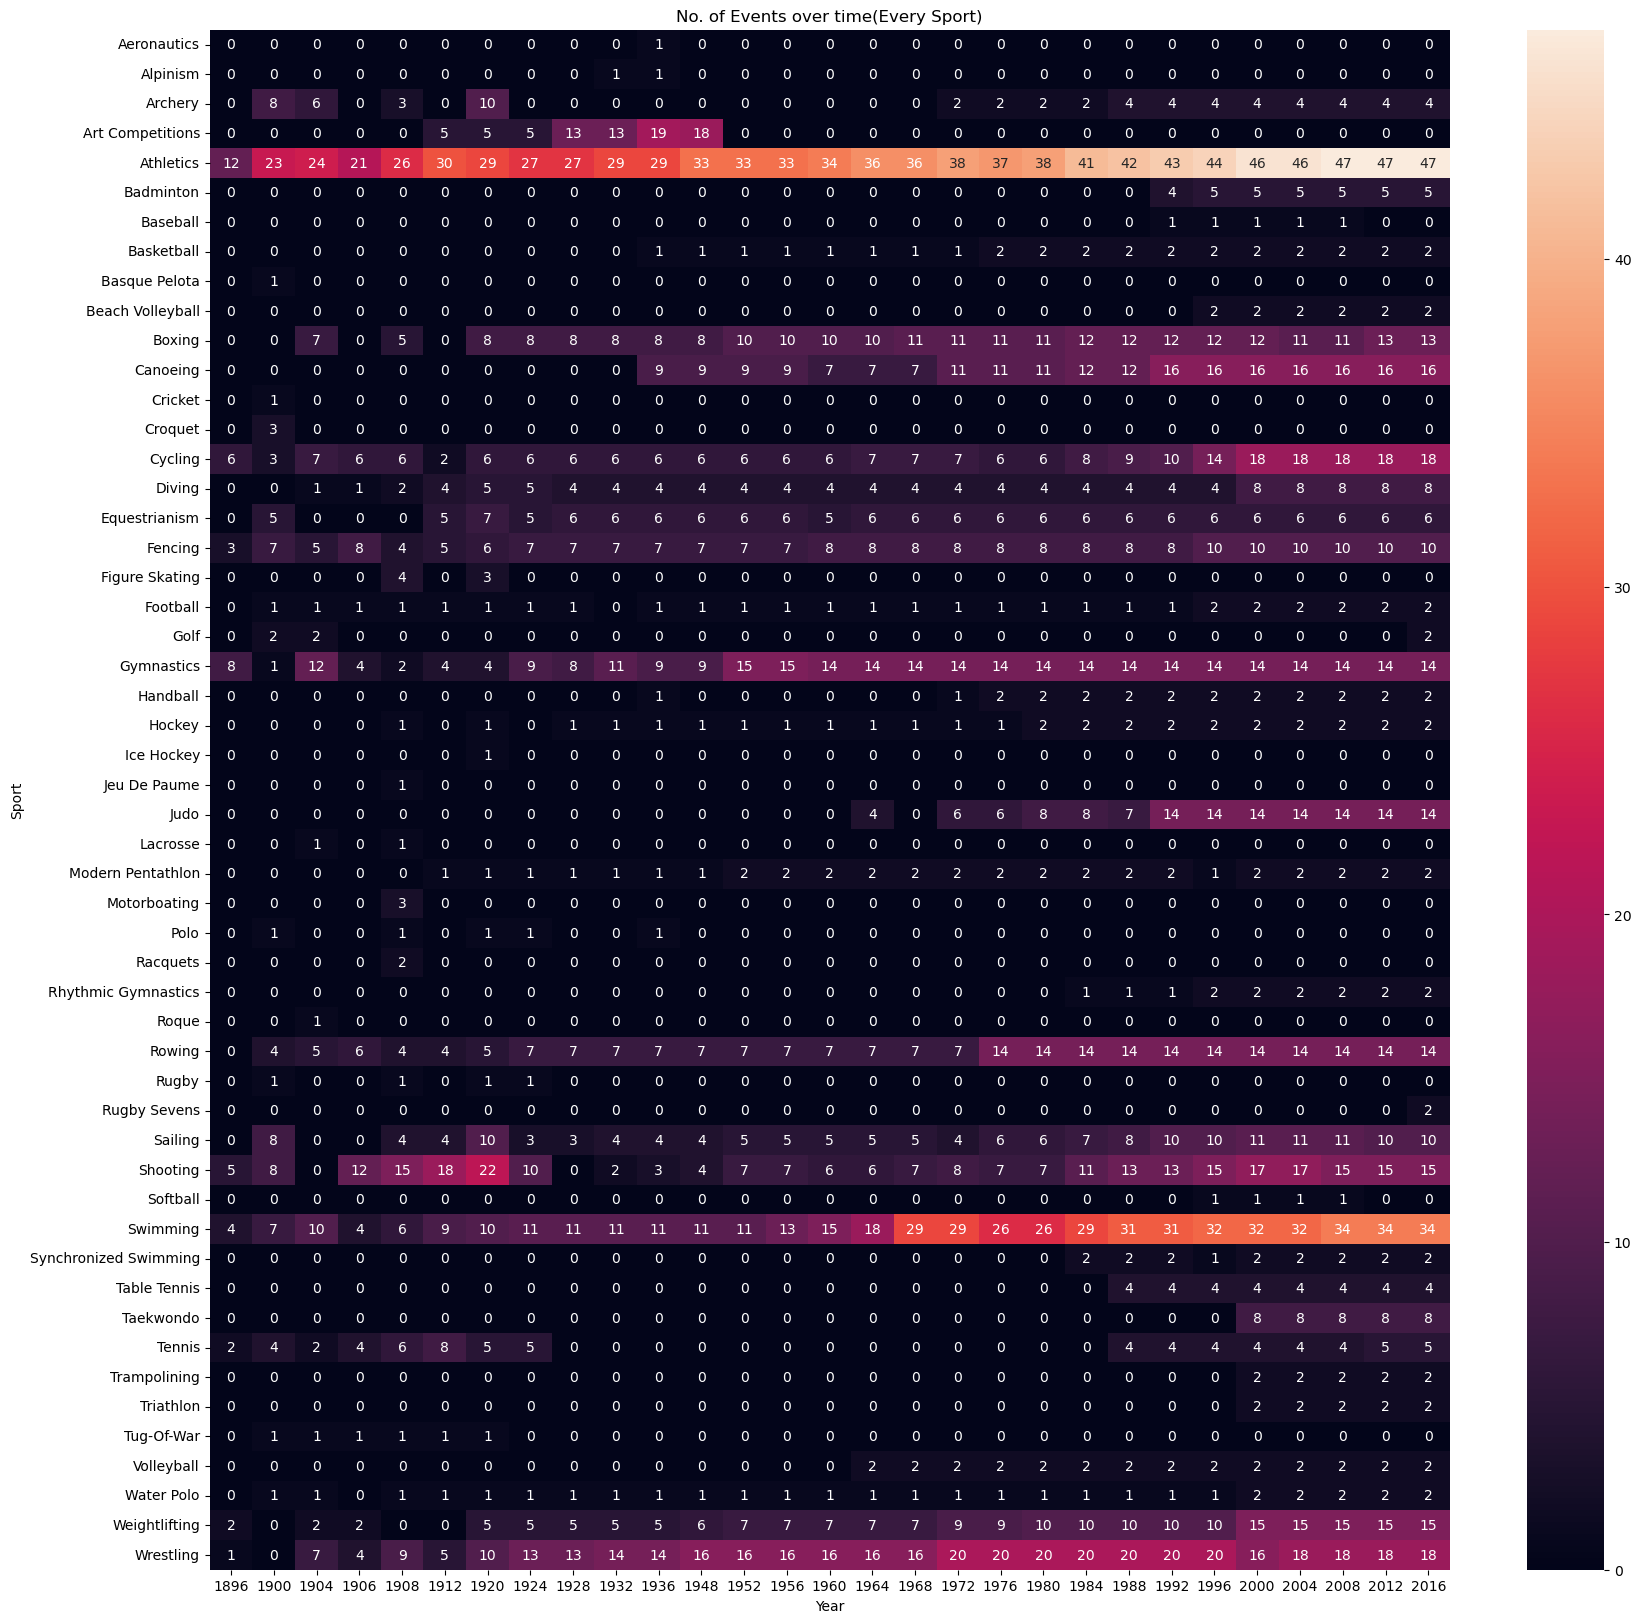

Select a Sport: Swimming
                                                Name  Medals     Sport  \
0                            Michael Fred Phelps, II      28  Swimming   
30   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12  Swimming   
47              Dara Grace Torres (-Hoffman, -Minas)      12  Swimming   
60                                Ryan Steven Lochte      12  Swimming   
74                     Natalie Anne Coughlin (-Hall)      12  Swimming   
86                    Matthew Nicholas "Matt" Biondi      11  Swimming   
98                                 Mark Andrew Spitz      11  Swimming   
110                             Gary Wayne Hall, Jr.      10  Swimming   
120                            Franziska van Almsick      10  Swimming   
143                        Shirley Frances Babashoff       9  Swimming   
154                                 Ian James Thorpe       9  Swimming   
164                               Leisel Marie Jones       9  Swimming   
174          

In [13]:
editions = df['Year'].nunique()
cities = df['City'].nunique()
sports = df['Sport'].nunique()
events = df['Event'].nunique()
athletes = df['Name'].nunique()
nations = df['region'].nunique()

print("Top Statistics")
print("Editions:", editions)
print("Hosts:", cities)
print("Sports:", sports)
print("Events:", events)
print("Nations:", nations)
print("Athletes:", athletes)

nations_over_time = data_over_time(df, 'region')
fig = px.line(nations_over_time, x="Edition", y="region")
plt.figure(figsize=(10, 6))
plt.title("Participating Nations over the years")
plt.plot(nations_over_time['Edition'], nations_over_time['region'])
plt.xlabel("Edition")
plt.ylabel("Nations")
plt.show()

events_over_time = data_over_time(df, 'Event')
fig = px.line(events_over_time, x="Edition", y="Event")
plt.figure(figsize=(10, 6))
plt.title("Events over the years")
plt.plot(events_over_time['Edition'], events_over_time['Event'])
plt.xlabel("Edition")
plt.ylabel("Events")
plt.show()

athlete_over_time = data_over_time(df, 'Name')
fig = px.line(athlete_over_time, x="Edition", y="Name")
plt.figure(figsize=(10, 6))
plt.title("Athletes over the years")
plt.plot(athlete_over_time['Edition'], athlete_over_time['Name'])
plt.xlabel("Edition")
plt.ylabel("Athletes")
plt.show()

plt.figure(figsize=(20, 20))
x = df.drop_duplicates(['Year', 'Sport', 'Event'])
ax = sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),
                annot=True)
plt.title("No. of Events over time(Every Sport)")
plt.show()

sport_list = df['Sport'].unique().tolist()
sport_list.sort()
sport_list.insert(0, 'Overall')

selected_sport = input("Select a Sport: ")
x = most_successful(df, selected_sport)
print(x)

### Country Wise Analysis

Select a Country: USA


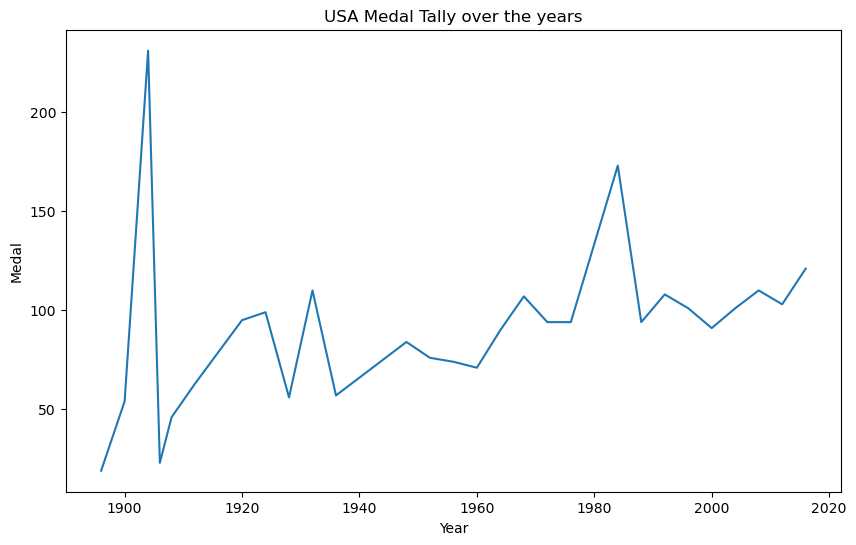

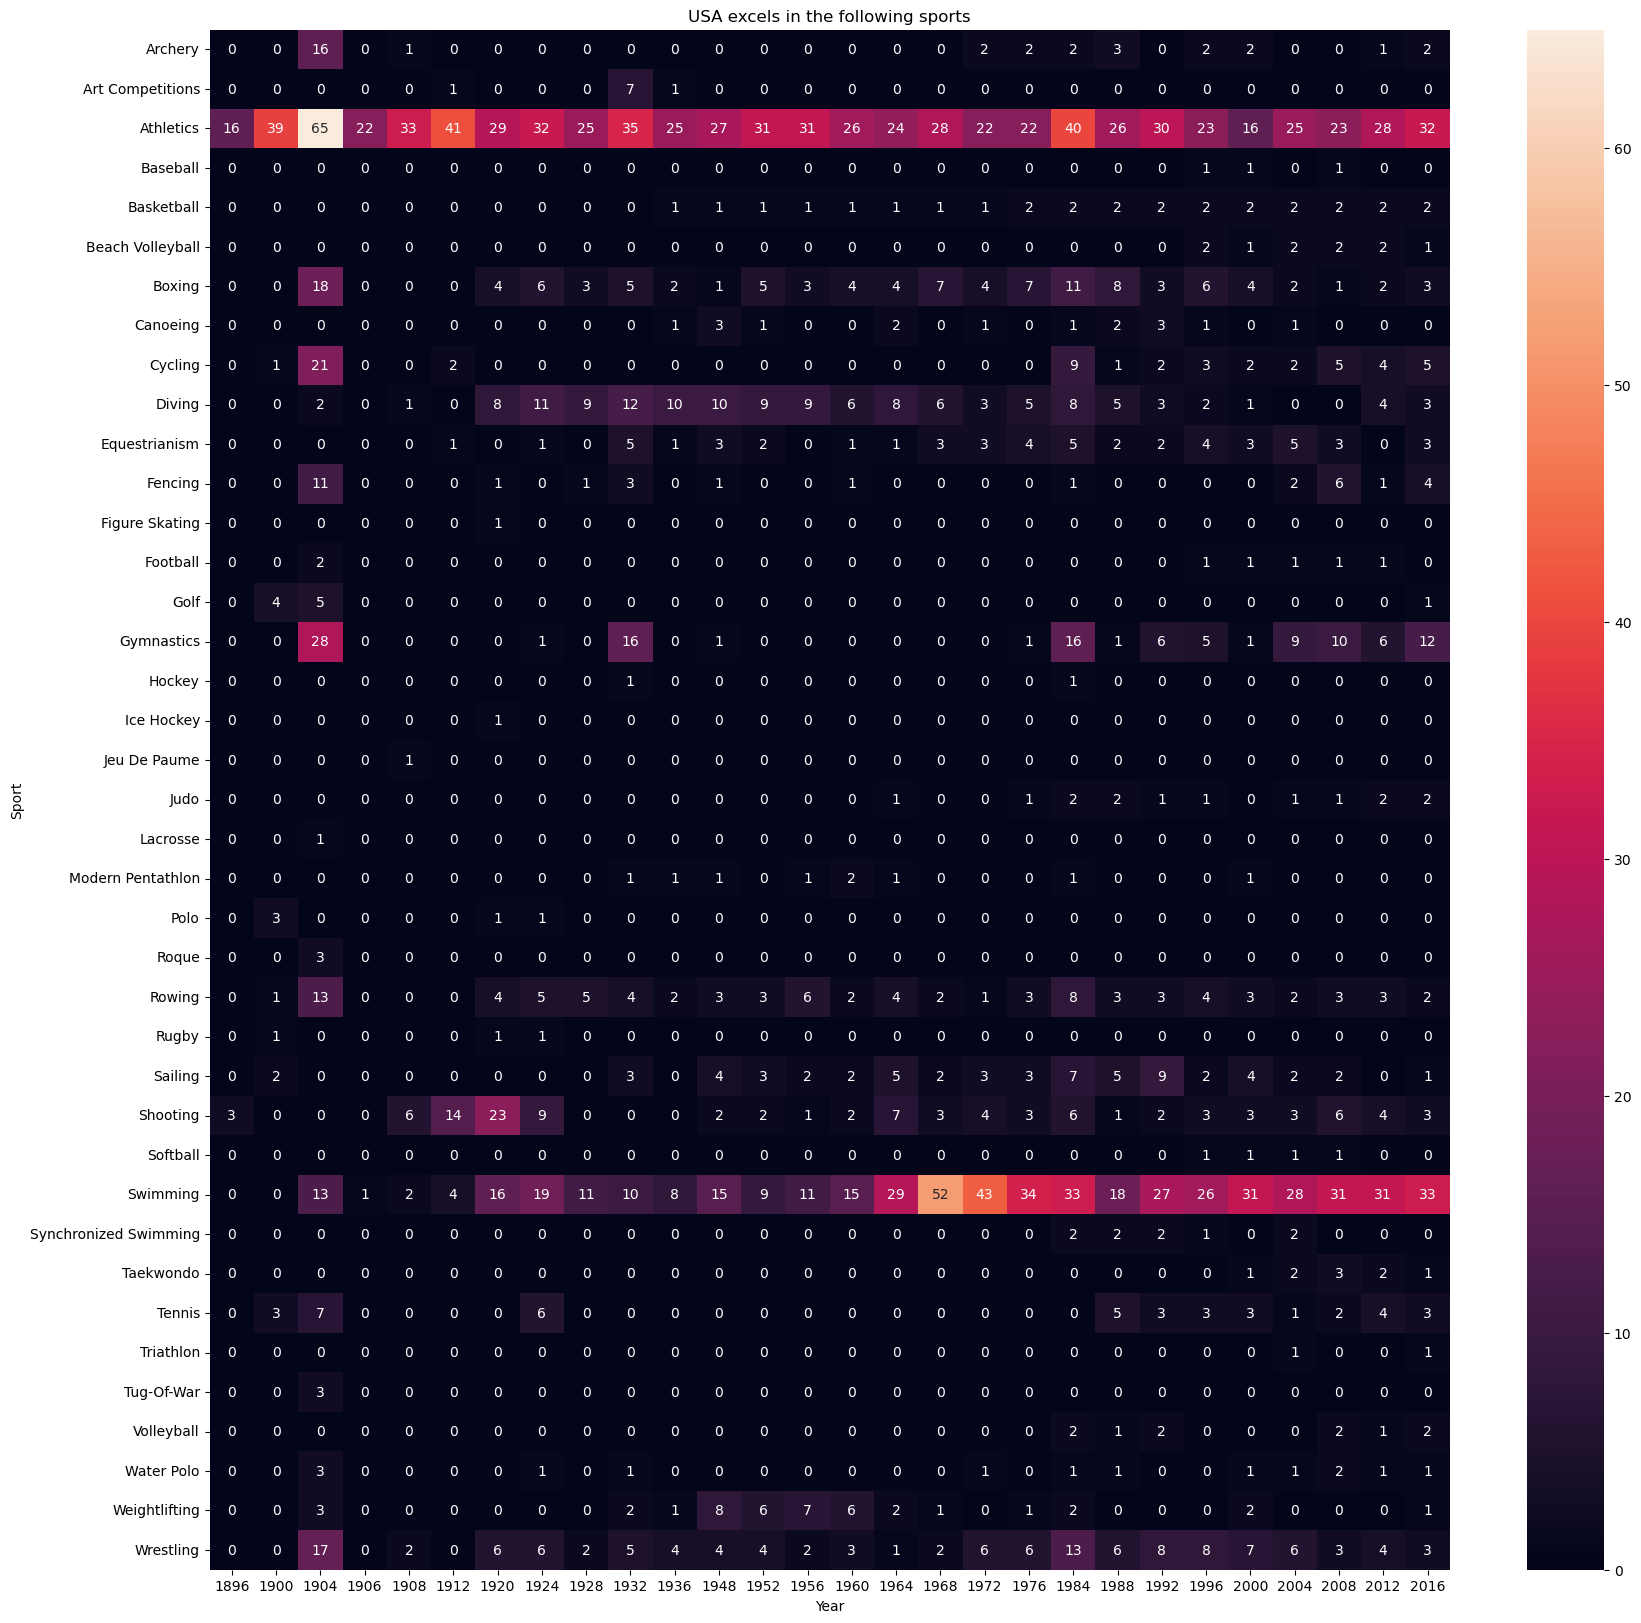

                                                Name  Medals      Sport
0                            Michael Fred Phelps, II      28   Swimming
30                                Ryan Steven Lochte      12   Swimming
44   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12   Swimming
61                     Natalie Anne Coughlin (-Hall)      12   Swimming
73              Dara Grace Torres (-Hoffman, -Minas)      12   Swimming
86                    Matthew Nicholas "Matt" Biondi      11   Swimming
98                              Carl Townsend Osburn      11   Shooting
114                                Mark Andrew Spitz      11   Swimming
126                      Raymond Clarence "Ray" Ewry      10  Athletics
136                   Frederick Carlton "Carl" Lewis      10  Athletics


In [14]:
country_list = df['region'].dropna().unique().tolist()
country_list.sort()

selected_country = input("Select a Country: ")

country_df = yearwise_medal_tally(df, selected_country)
fig = px.line(country_df, x="Year", y="Medal")
plt.figure(figsize=(10, 6))
plt.title(selected_country + " Medal Tally over the years")
plt.plot(country_df['Year'], country_df['Medal'])
plt.xlabel("Year")
plt.ylabel("Medal")
plt.show()

pt = country_event_heatmap(df, selected_country)
plt.figure(figsize=(20, 20))
ax = sns.heatmap(pt, annot=True)
plt.title(selected_country + " excels in the following sports")
plt.show()

top10_df = most_successful_countrywise(df, selected_country)
print(top10_df)

### Athlete Wise Analysis

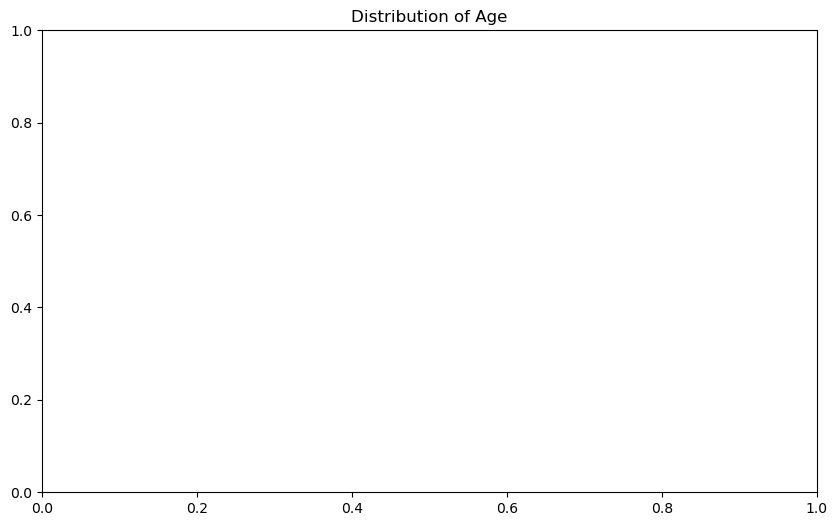

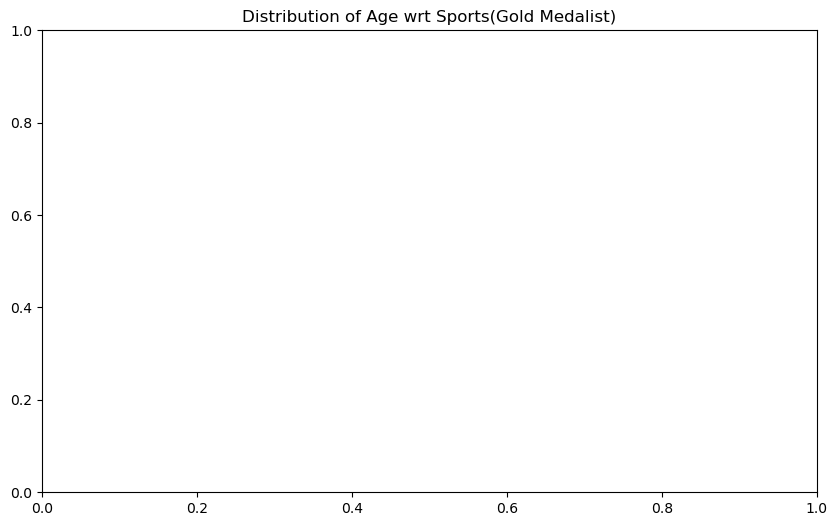

Select a Sport: Swimming


C:\Users\Dhairya Singla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



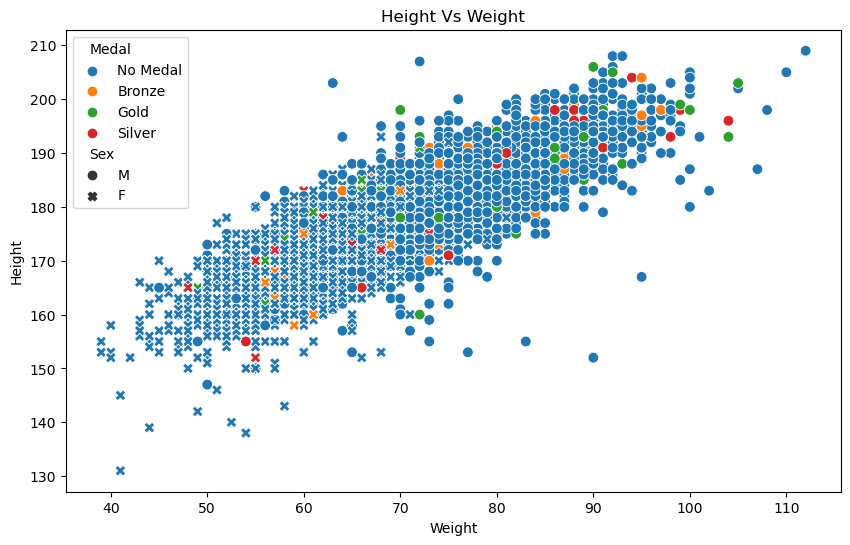

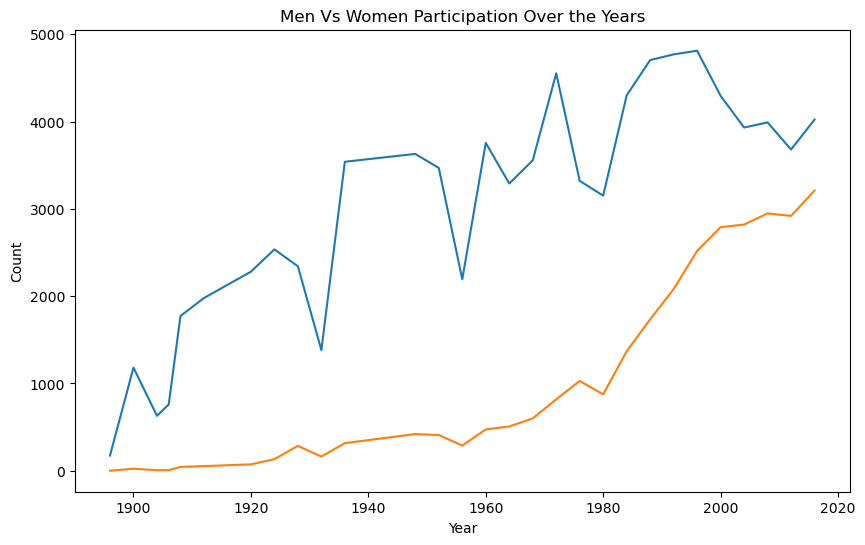

In [15]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],show_hist=False, show_rug=False)
fig.update_layout(autosize=False,width=1000,height=600)
plt.figure(figsize=(10, 6))
plt.title("Distribution of Age")
plt.show()

x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                    'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)
plt.figure(figsize=(10, 6))
plt.title("Distribution of Age wrt Sports(Gold Medalist)")
plt.show()

sport_list = df['Sport'].unique().tolist()
sport_list.sort()
sport_list.insert(0, 'Overall')

selected_sport = input("Select a Sport: ")
temp_df = weight_v_height(df,selected_sport)
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=60)
plt.title('Height Vs Weight')
plt.show()

final = men_vs_women(df)
fig = px.line(final, x="Year", y=["Male", "Female"])
plt.figure(figsize=(10, 6))
plt.title("Men Vs Women Participation Over the Years")
plt.plot(final['Year'], final[["Male", "Female"]])
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()